# Zernike 3D 


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from mayavi import mlab
from scipy.special import sph_harm
from math import factorial as fact
from math import sqrt, sin, cos, atan2

def binomial(n, k): return fact(n)  / (fact(k) * fact(n - k))

In [6]:
class Zernike3D:
    def __init__(self, IMG3D: np.array):
        self.IMG3D = IMG3D

    def radial(self, n: int, l: int) -> ():
        """Radial Zernike polynomials normalized for 3D case for given order n, l."""
        # normalization factor
        Q = lambda k, l, nu: ((-1)**(k + nu) / 4**k) *\
                             sqrt((2 * l + 4 * k + 3) / 3) *\
                             (binomial(2 * k, k) * binomial(k, nu) * binomial(2 * (k + l + nu) + 1, 2 * k) / binomial(k + l + nu, k))
        if (n - l) % 2 != 0: 
            return lambda r: 0
        else:
            return lambda r: sum([Q((n - l) / 2, l, nu) * r**(2 * nu + l) for nu in range((n - l) // 2 + 1)]) 
    
    def moment(self, n: int, l: int, m: int) -> ():
        """Zernike 3D moment of given order n, l, m."""
        # check parameters validity
        # init radial part
        R = self.radial(abs(n), abs(l))
        # moment function
        def Z(x, y, z) -> ():
            if x**2 + y**2 + z**2 > 1:
                return 0
            else:
                r = sqrt(x**2 + y**2 + z**2)
                theta = atan2(sqrt(x**2 + y**2), z)
                phi = atan2(y, x)
                return  R(r) * sph_harm(m, l, theta, phi)
        return Z

    def descriptor(self, n: int):
        """Zernike 3D descriptor vector of given order."""
        # determine the Zernike moments on the grid of the given 3D image
        # excluding points with zero x, y, z uncertainty 0 / 0 or inf / 0
        pass

    def plot_radial(self, n: int, l: int):
        """Plot radial Zernike polynom of order n."""
        R = self.radial(n, l)
        x = np.arange(0, 1, 0.01)
        y = np.array([R(r) for r in x])

        plt.figure(dpi=100)
        plt.plot(x, y)
        plt.xlim(0, 1.1)
        plt.ylabel(f'$R_{n}^{l}(r)$')
        plt.xlabel('r')
        plt.show()

    def plot_moment_slice(self, n: int, l: int, m: int, lattitude: int=1):
        """Plot 3D Zernike moment slice at the level lattitude * grid_step."""
        Z = self.moment(n, l, m)
        d = 0.01
        x = np.concatenate([np.arange(-1, -d, d), np.arange(d, 1 + d, d)])
        z = np.array([[np.real(Z(xi, yi, lattitude * d)) for xi in x] for yi in x])

        plt.figure(dpi=150)
        plt.imshow(z, cmap='rainbow')
        plt.show()

    def plot_moment_3d(self, n: int, l: int, m: int):
        """Plot 3D zernike moment in 3D as density plot."""
        
        

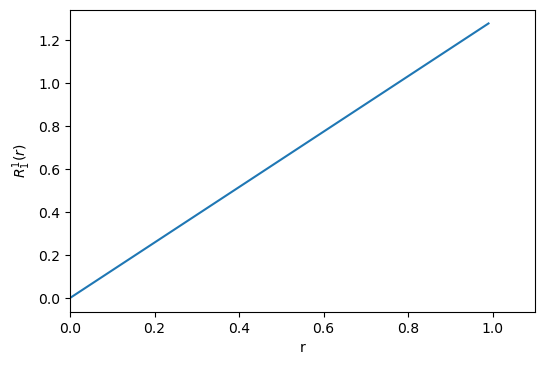

In [7]:
test_3dimg = np.zeros((10, 10, 10))

zen = Zernike3D(test_3dimg)

zen.plot_radial(1, 1)

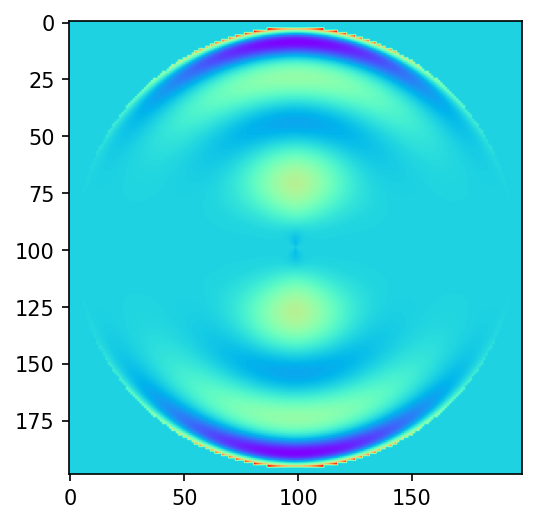

In [19]:
zen.plot_moment_slice(10, 4, 4, 20)

In [4]:
from scipy import stats

mu, sigma = 0, 0.1 
x = 10*np.random.normal(mu, sigma, 5000)
y = 10*np.random.normal(mu, sigma, 5000)    
z = 10*np.random.normal(mu, sigma, 5000)

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)

# Evaluate kde on a grid
xmin, ymin, zmin = x.min(), y.min(), z.min()
xmax, ymax, zmax = x.max(), y.max(), z.max()
xi, yi, zi = np.mgrid[xmin:xmax:30j, ymin:ymax:30j, zmin:zmax:30j]
coords = np.vstack([item.ravel() for item in [xi, yi, zi]]) 
density = kde(coords).reshape(xi.shape)

print(xi[0][0])
print(density[0][0])

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')

grid = mlab.pipeline.scalar_field(xi, yi, zi, density)
min = density.min()
max=density.max()
mlab.pipeline.volume(grid, vmin=min, vmax=min + .5*(max-min))

mlab.axes()
mlab.show()

[-3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354
 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354
 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354
 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354
 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354 -3.49255354]
[9.11731338e-21 1.85803090e-19 1.93592833e-18 1.03134582e-17
 2.81297682e-17 4.03062589e-17 4.49179994e-17 1.34756292e-16
 4.72903894e-16 1.58827289e-15 4.16061321e-14 1.21048211e-12
 1.83752127e-11 1.42661470e-10 5.66282435e-10 1.14924583e-09
 1.19262330e-09 6.33995022e-10 1.76878768e-10 3.38792308e-11
 1.14806049e-11 4.98327016e-12 2.14392731e-12 6.90401707e-12
 2.56032966e-11 4.96654708e-11 4.92773822e-11 2.49973516e-11
 6.48319963e-12 8.59673636e-13]


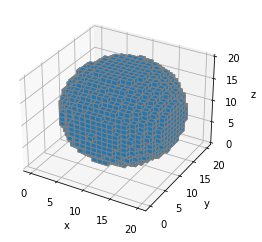

In [19]:
from mpl_toolkits.mplot3d import Axes3D

def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    return ax

def sphere(x, y, z):
    if x**2 + y**2 + z**2 <= 1:
        return 1
    else:
        return 0

filled = np.array([[[sphere(i, j, k) for i in np.arange(-1, 1, 0.1)] for j in np.arange(-1, 1, 0.1)] for k in np.arange(-1, 1, 0.1)])

ax = make_ax(True)
ax.voxels(filled, edgecolors='gray', shade=False)
plt.show()
